In [17]:
from sklearn.datasets import load_iris

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns

In [23]:
data= load_iris()
dp = pd.DataFrame(data.data,columns = data.feature_names)

In [25]:
dp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
dp.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [27]:
dp.shape

(150, 4)

In [31]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [37]:
X = dp.values[:,:]
X = py.nan_to_num(X)
dp1 = StandardScaler().fit_transform(X)
dp1

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [45]:
dp.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [49]:
from sklearn.cluster import KMeans
import pylab as pl


In [57]:
Cnum = 4
k_means = KMeans(init = "k-means++",n_clusters = 4,n_init = 18)
k_means.fit(X)

lebals = k_means.labels_ #
print(lebals)

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0
 2 0]


In [61]:
k_means.cluster_centers_

array([[6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [63]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X,lebals)
silhouette_avg

0.49805050499728737

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

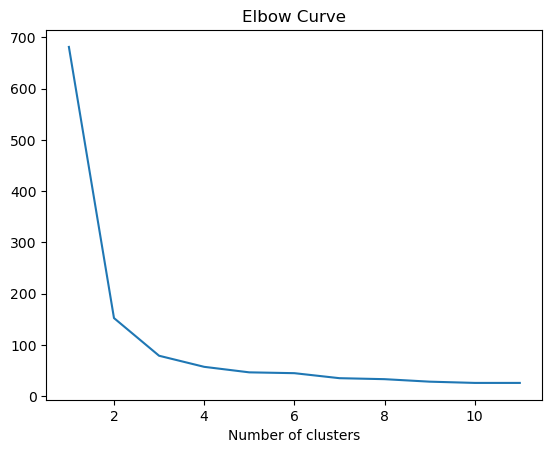

In [69]:
Nc = range(1,12)
k_means = [KMeans(n_clusters = i) for i in Nc]
k_means
iris = [k_means[i].fit(X).inertia_ for i in range(len(k_means))]
iris
plt.plot(Nc,iris)
plt.xlabel('Number of clusters')
plt.title('Elbow Curve')
plt.show()
           



In [73]:
dp['clust']=lebals
dp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clust
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [75]:
dp.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
clust                0.277883
dtype: float64

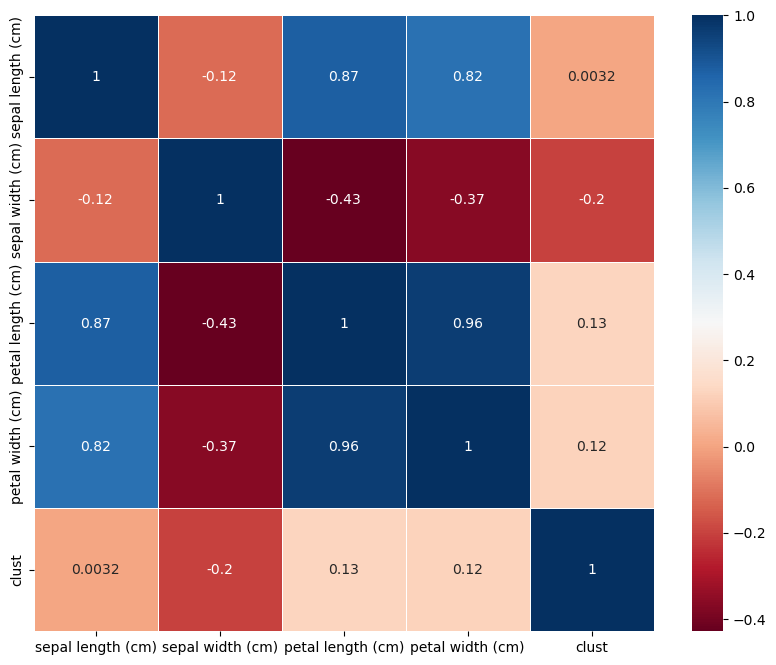

In [79]:
cor_matrix = dp.corr(numeric_only = True)
plt.figure(figsize = (10,8))
sns.heatmap(cor_matrix,annot = True,cmap = "RdBu",linewidth = 0.5)
plt.show()

In [85]:
X = dp.iloc[:,[3,4]].values

In [83]:
import scipy.cluster.hierarchy as sch

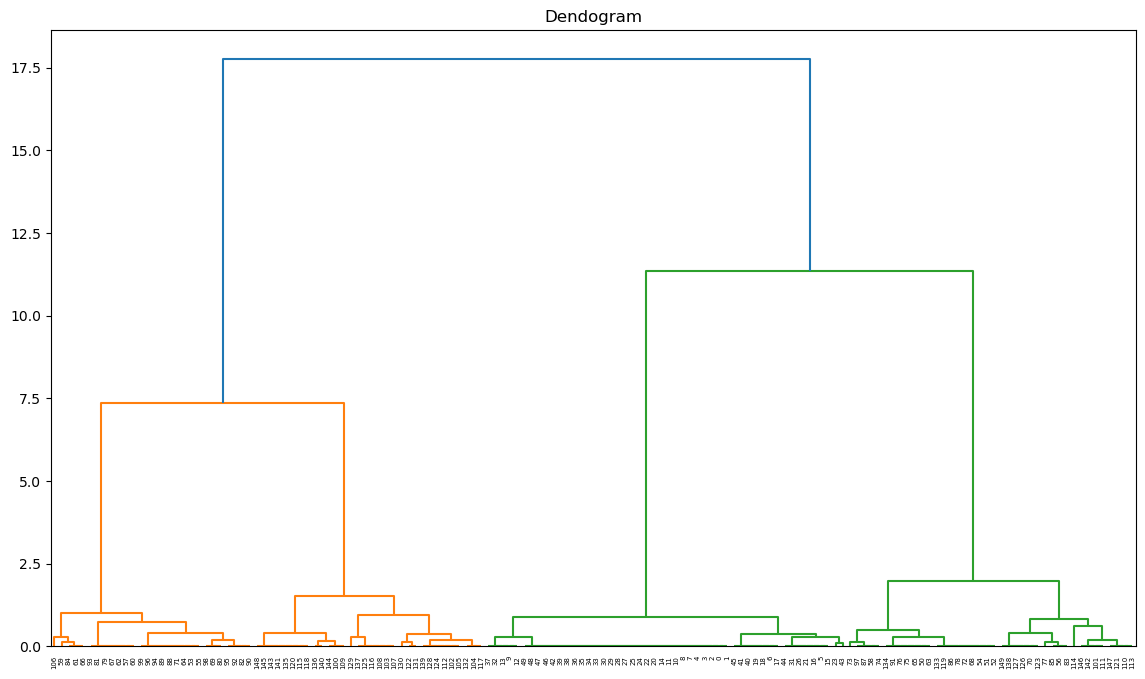

In [87]:
plt.figure(figsize = (14,8))
plt.title('Dendogram')
dendogram = sch.dendrogram(sch.linkage (X,method = 'ward'))

plt.show()

In [93]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4,metric = 'euclidean',linkage = 'ward')
y = hc.fit_predict(X)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)